In [1]:
#Paquetes utilizados
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.tsa.stattools import adfuller
from pandas import Series
import matplotlib as mpl
import plotly.express as px
from statsmodels.tsa import seasonal
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smtsa

C:\Users\karen\anaconda3\envs\myenv\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\karen\anaconda3\envs\myenv\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
C:\Users\karen\anaconda3\envs\myenv\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df=pd.read_excel("loadsts.xlsx")
df.index = df['Posted_date']

In [4]:
#H0: La serie no es estacionaria
#H1: La serie es estacionaria
adf_result = adfuller(df['Loads'], autolag='AIC')
adf_result[1]

0.5182986536343417

In [5]:
series = df['Loads']
series = Series(series)
series.describe()

count    184.000000
mean     169.146739
std       51.300094
min        5.000000
25%      137.000000
50%      172.500000
75%      212.250000
max      250.000000
Name: Loads, dtype: float64

In [1]:
decompose_model = seasonal.seasonal_decompose(df.Loads.tolist(), period= 4, model='additive')

fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(5.5, 5.5)

df['Loads'].plot(ax=axarr[0], color='b', linestyle='-')
axarr[0].set_title('Weekly loads booking')

pd.Series(data=decompose_model.trend, index=df.index).plot(color='r', linestyle='-', ax=axarr[1])
axarr[1].set_title('Trend component in weekly booking')

pd.Series(data=decompose_model.seasonal, index=df.index).plot(color='g', linestyle='-', ax=axarr[2])
axarr[2].set_title('Seasonal component in weekly booking')

pd.Series(data=decompose_model.resid, index=df.index).plot(color='k', linestyle='-', ax=axarr[3])
axarr[3].set_title('Irregular variations in weekly booking')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0);
plt.xticks(rotation=10);

NameError: name 'seasonal' is not defined

## analisis de estacionalidad

In [7]:
df['Month'] = df['Posted_date'].dt.to_period('M').astype(str)

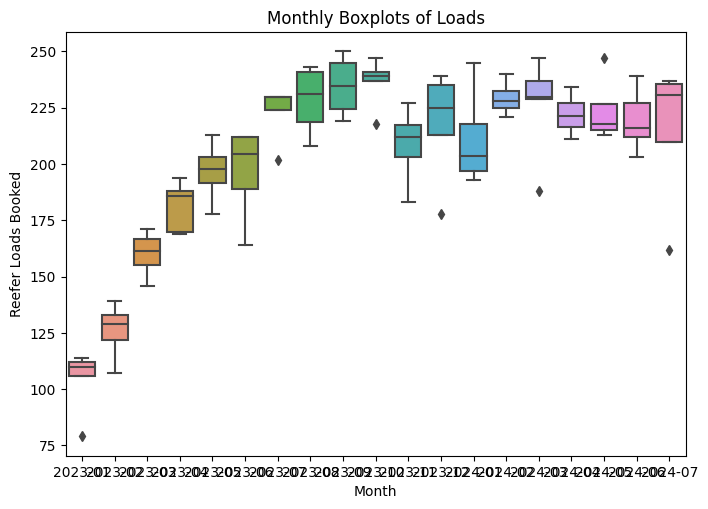

In [8]:
stational=df.loc[(df['Posted_date']>'2022-12-30')]

plt.figure(figsize=(8, 5.5))
g = sns.boxplot(stational, y='Loads', x='Month')
g.set_title('Monthly Boxplots of Loads')
g.set_xlabel('Month')
g.set_ylabel('Reefer Loads Booked');

In [9]:
df['Loads_diff']=df['Loads'].diff()

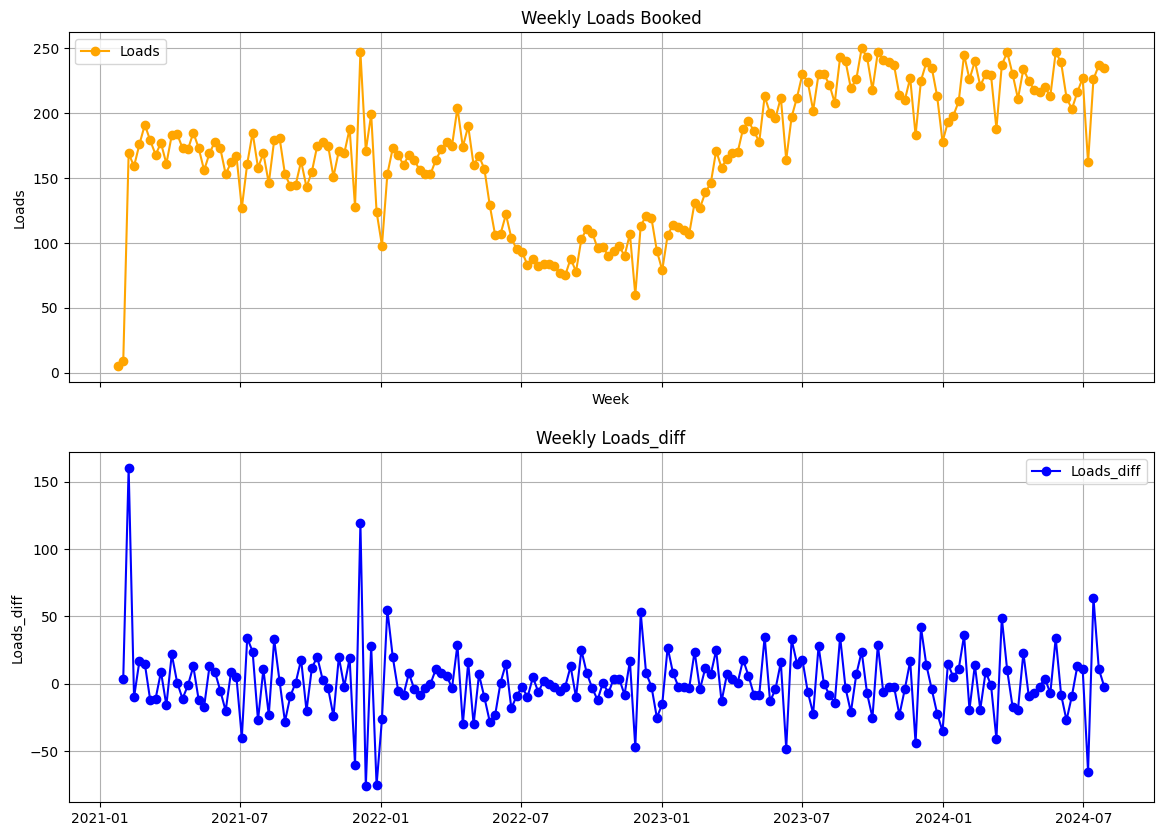

In [10]:
fig, (ax2, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), sharex=True)

ax2.plot(df.index, df['Loads'], color='orange', label='Loads', marker='o')
ax2.set_title('Weekly Loads Booked')
ax2.set_xlabel('Week')
ax2.set_ylabel('Loads')
ax2.legend()
ax2.grid()

ax1.plot(df.index, df['Loads_diff'], color='blue', label='Loads_diff', marker='o')
ax1.set_title('Weekly Loads_diff')
ax1.set_ylabel('Loads_diff')
ax1.legend()
ax1.grid()

In [11]:
#H0: La serie no es estacionaria
#H1: La serie es estacionaria
adf_result = adfuller(df['Loads_diff'].dropna(), autolag='AIC')
adf_result[1]

ts=df['Loads_diff'].dropna()

<Figure size 550x550 with 0 Axes>

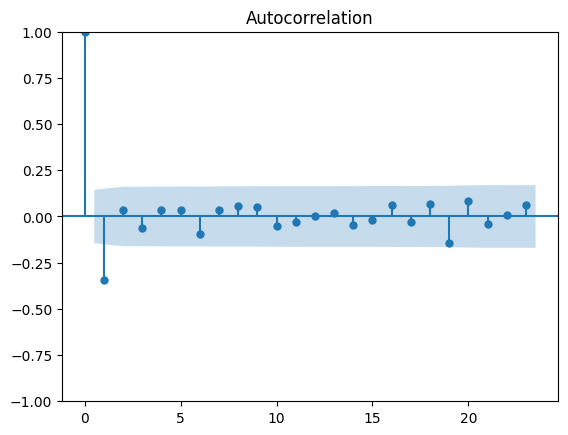

In [12]:
plt.figure(figsize=(5.5, 5.5));
plot_acf(ts);

<Figure size 550x550 with 0 Axes>

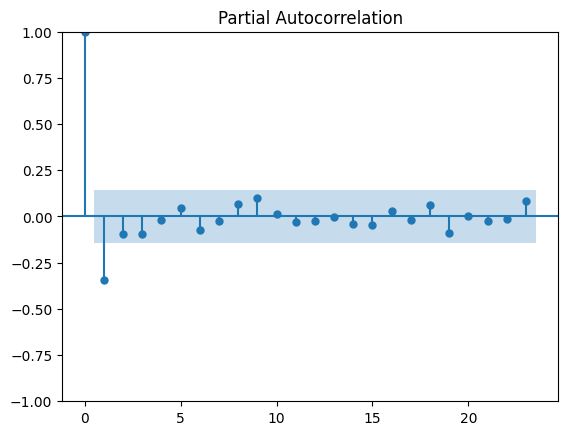

In [13]:
plt.figure(figsize=(5.5, 5.5));
plot_pacf(ts);